In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score

In [11]:
test_data = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# Data Understanding

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
test_data.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [13]:
train.duplicated().sum()

0

In [14]:
test_data.duplicated().sum()

0

# Data Cleaning

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train = train.drop(columns=["PassengerId", "Cabin","Ticket","Name"])
test = test_data.drop(columns=["PassengerId", "Cabin","Ticket","Name"])

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [21]:
train["Survived"].unique()

array([0, 1], dtype=int64)

In [22]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [24]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [26]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [28]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [30]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [31]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Null Value Imputation 1

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
int(train['Age'].mean())

29

In [39]:
train['Age'] = train['Age'].fillna(int(train['Age'].mean()))

In [36]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [43]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [47]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [49]:
train.isnull().mean()*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [50]:
test.isnull().mean()*100

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

# Exploratory Data Analysis

In [51]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


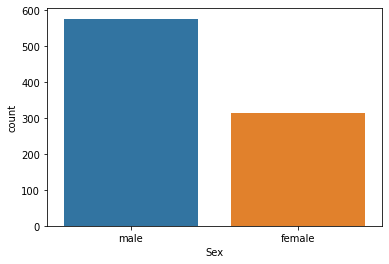

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


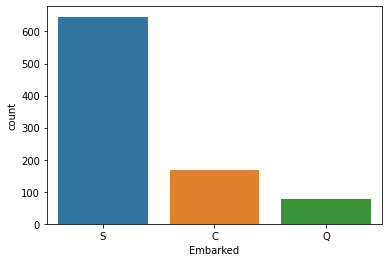

In [53]:
# Bar Plot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(sns.countplot(train[train.columns[i]]))

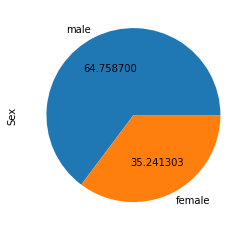

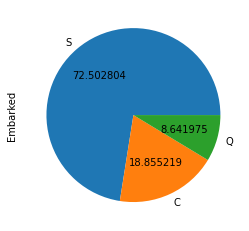

In [54]:
# Pie Chart
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(train[train.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

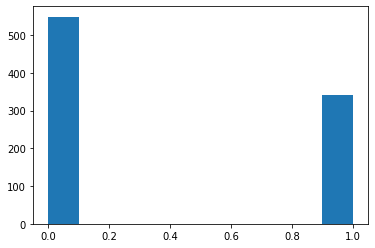

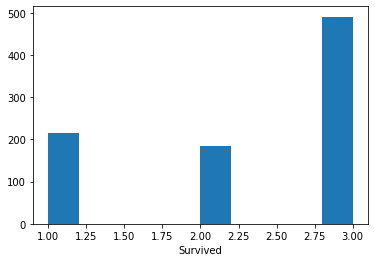

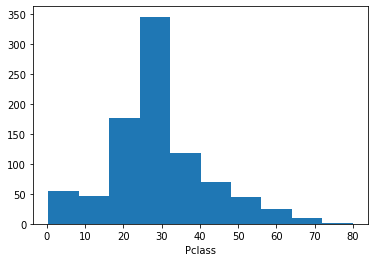

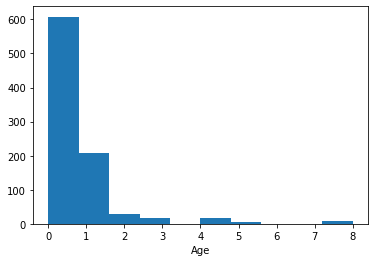

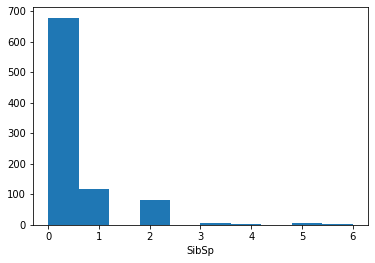

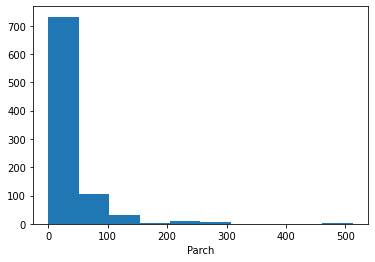

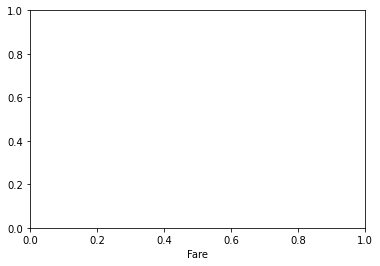

In [55]:
# Histogram
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(plt.hist(train[train.columns[i]]))
        plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


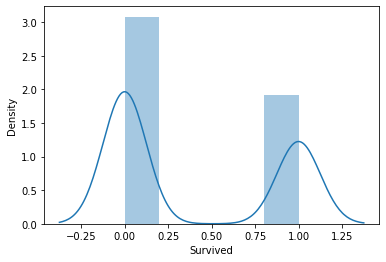

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


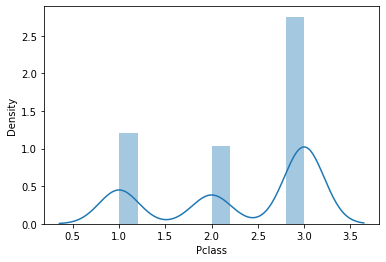

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


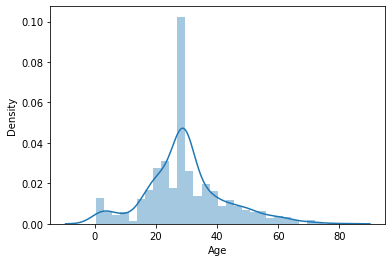

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


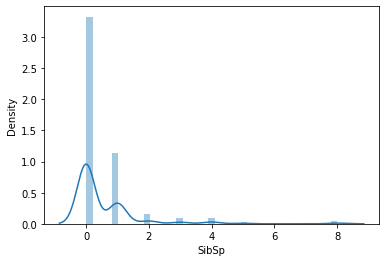

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


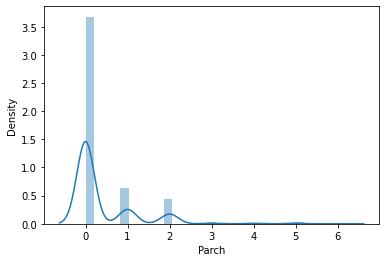

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


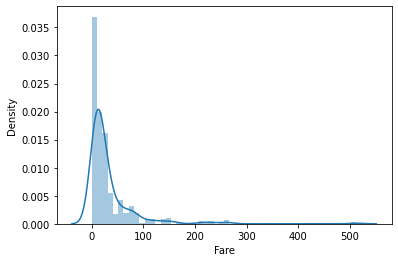

In [56]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


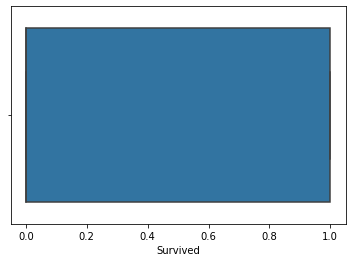

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


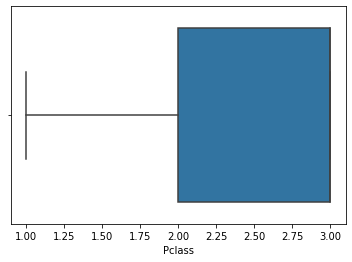

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


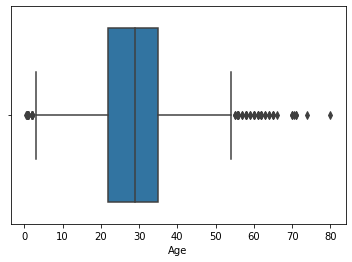

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


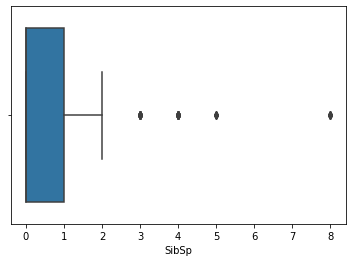

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


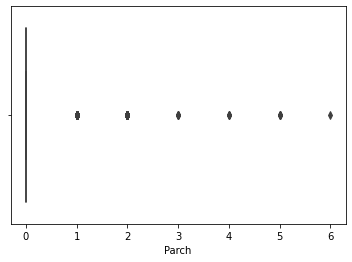

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


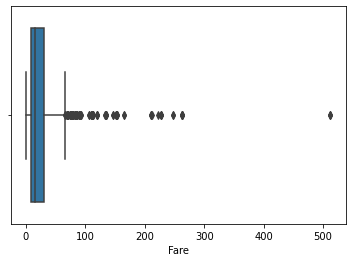

In [57]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [58]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Numeriacl - Numerical

ScatterPlot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

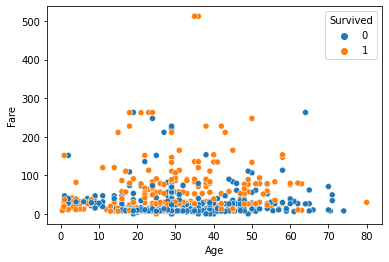

In [66]:
sns.scatterplot(train["Age"], train["Fare"], hue=train["Survived"])

Line PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Survived'>

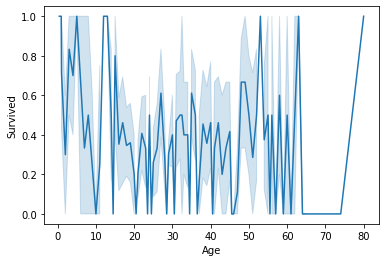

In [67]:
sns.lineplot(train["Age"], train["Survived"])

Numericaal - Categorical

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Bar PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


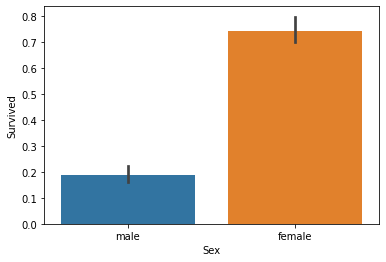

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


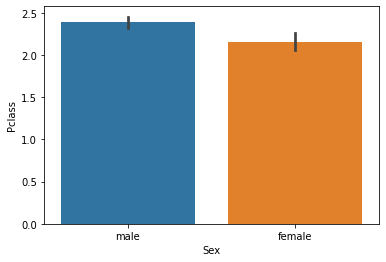

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


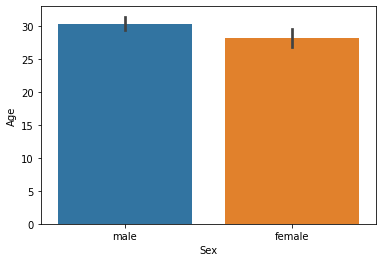

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


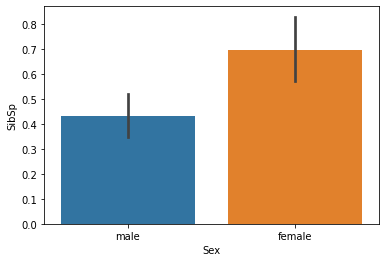

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


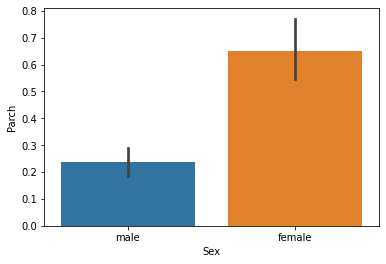

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


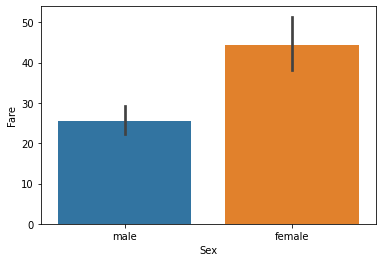

In [70]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(train["Sex"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


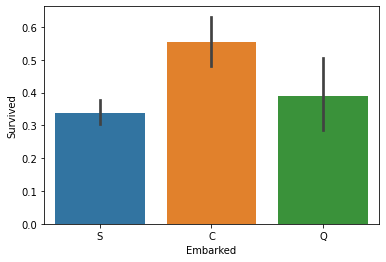

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


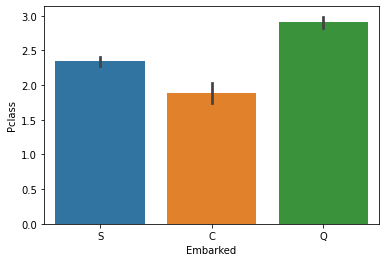

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


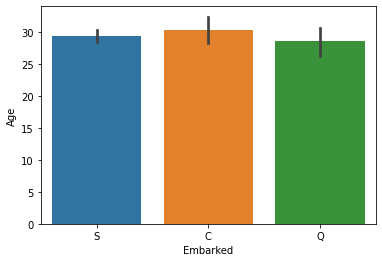

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


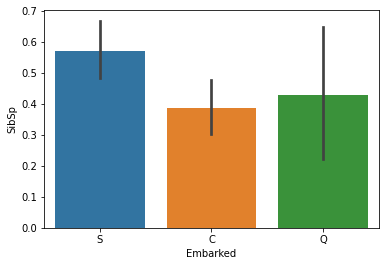

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


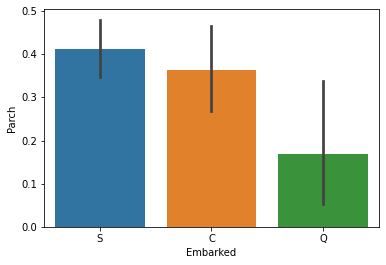

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


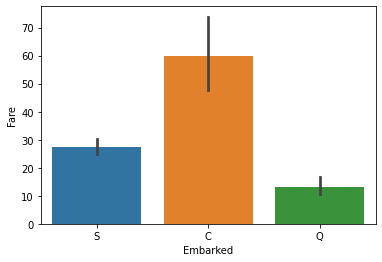

In [71]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(train["Embarked"], train[train.columns[i]]))

Box Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


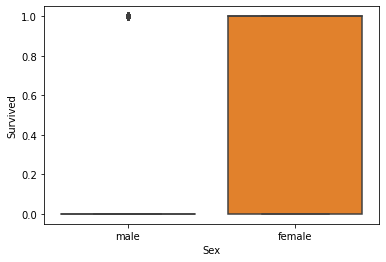

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


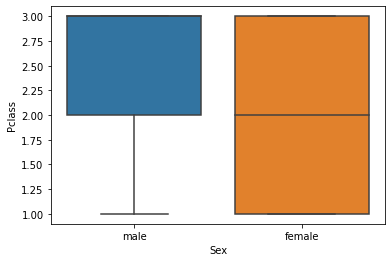

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


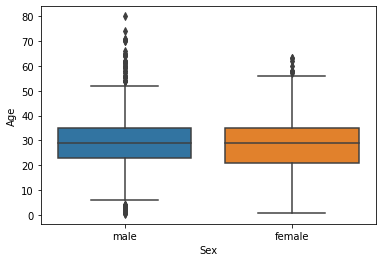

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


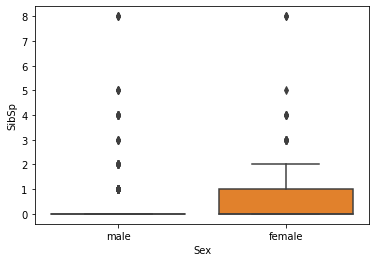

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


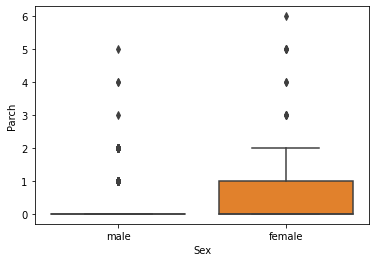

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


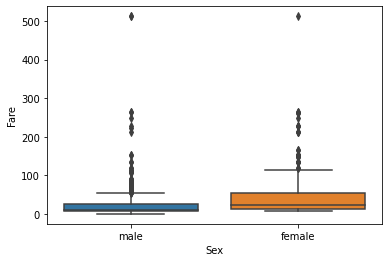

In [72]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train["Sex"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


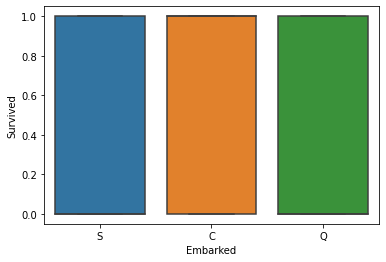

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


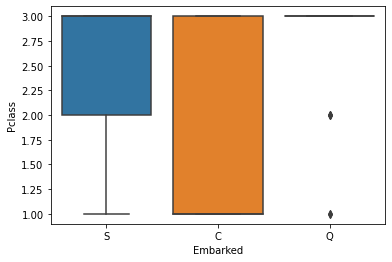

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


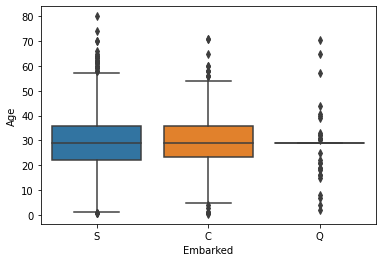

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


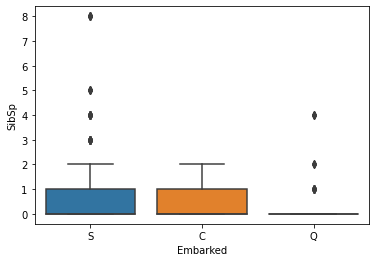

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


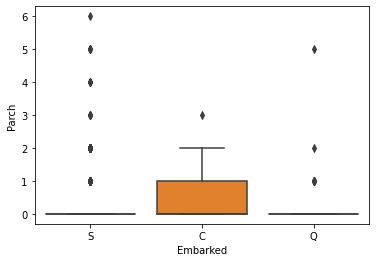

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


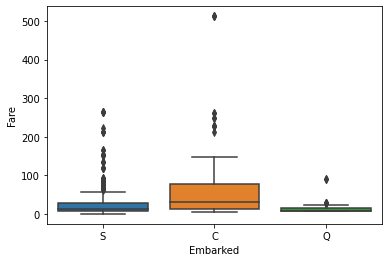

In [74]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train["Embarked"], train[train.columns[i]]))

Categorical - Categorical

In [75]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


HeatMap

<AxesSubplot:xlabel='Embarked', ylabel='Sex'>

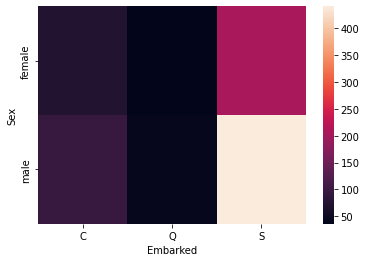

In [76]:
sns.heatmap(pd.crosstab(train["Sex"], train["Embarked"]))

ClusterMap

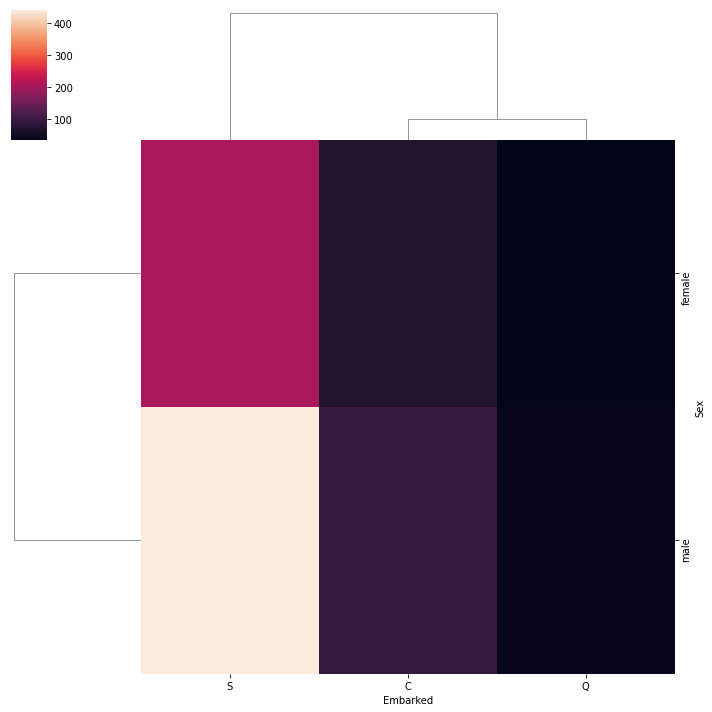

In [77]:
sns.clustermap(pd.crosstab(train["Sex"], train["Embarked"]))

Multivariant Analysis

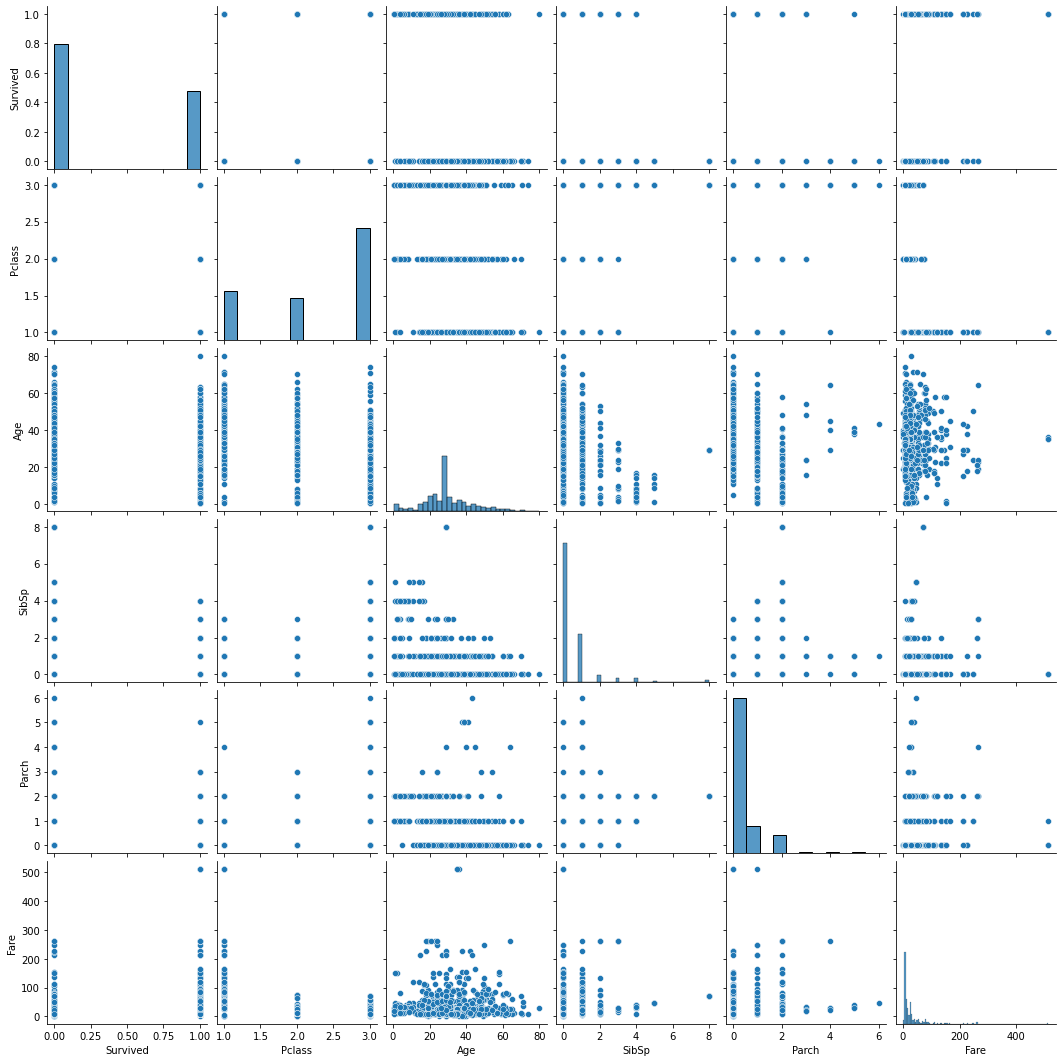

In [78]:
#sns.pairplot(train, hue ="species")
sns.pairplot(train)

In [79]:
train.shape

(891, 8)

In [80]:
test.shape

(418, 7)

# Feature Transformation

1. Outlier Detection

In [81]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


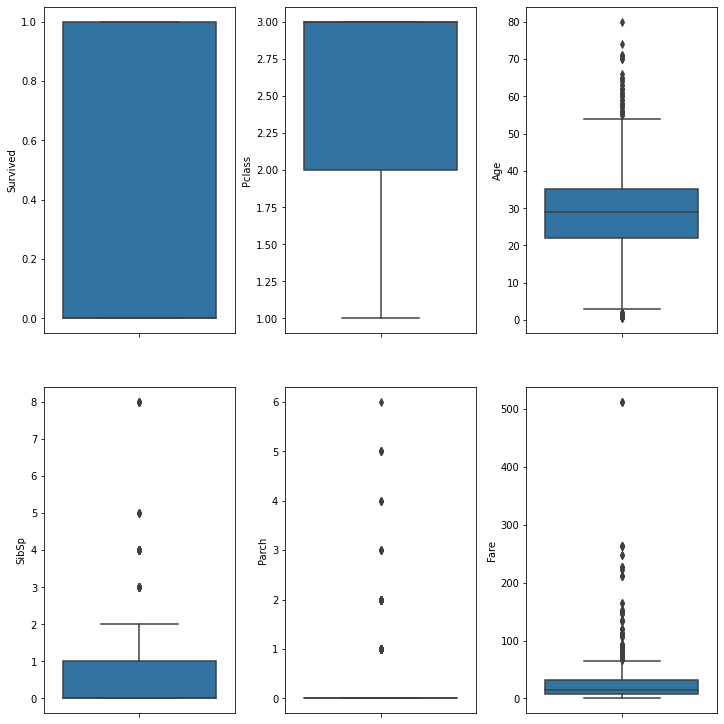

In [85]:
data1 = train.drop(columns=["Sex", "Embarked"], axis=1)
#data1.head()

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

2. Handling Categorical Features 

3. Feature Scaling - Normalization

In [86]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [89]:
x = train.iloc[:,1:]
y = train.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [90]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [91]:
y_train.head()

30     0
10     1
873    0
182    0
876    0
Name: Survived, dtype: int64

In [94]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ["Sex", "Embarked"]),
    ("tnf2", MinMaxScaler(), ["Age", "SibSp", "Parch", "Fare"])
], remainder="passthrough")

In [95]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [96]:
test_transformed = transformer.transform(test)

In [98]:
x_train.shape

(712, 8)

In [99]:
# Sampling the Data
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [102]:
counter = Counter
print("BEFORE :",counter(y_train))
print("AFTER :",counter(y_train_sm))

BEFORE : Counter({0: 449, 1: 263})
AFTER : Counter({0: 449, 1: 449})


# Model Building

**Logistic Regression**

In [103]:
logr = LogisticRegression()
model = logr.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

77.09497206703911

In [104]:
score = []
for i in range(5000):
    x = train.iloc[:,1:]
    y = train.iloc[:,0]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    logr = LogisticRegression()
    logr.fit(x_train_sm,y_train_sm)
    pred = logr.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  2014
88.26815642458101


In [129]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2014)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model1 = logr.fit(x_train_sm,y_train_sm)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

88.8268156424581

**Decision Tree Classifier**

In [119]:
dtc = DecisionTreeClassifier()
model = dtc.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

81.56424581005587

In [120]:
score = []
for i in range(500):
    x = train.iloc[:,1:]
    y = train.iloc[:,0]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train_sm,y_train_sm)
    pred = dtc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  420
86.03351955307262


In [128]:
dtc = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=420)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model2 = dtc.fit(x_train_sm,y_train_sm)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

85.47486033519553

**Random Forest Classifier**

In [108]:
rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4)
rf.fit(x_train_sm,y_train_sm)
pred = rf.predict(x_test)
accuracy_score(y_test, pred)*100

86.59217877094973

In [110]:
score = []
for i in range(500):
    x = train.iloc[:,1:]
    y = train.iloc[:,0]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)
    rfc.fit(x_train_sm,y_train_sm)
    pred = rfc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  396
86.59217877094973


In [118]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=396)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model3 = rfc.fit(x_train_sm,y_train_sm)
pred = model3.predict(x_test)
accuracy_score(y_test, pred)*100

86.59217877094973

In [132]:
test_pred = model1.predict(test_transformed)
test_pred.shape

(418,)

In [134]:
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],"Survived": test_pred})
submission.to_csv('titanic_submission.csv', index=False)